# Ingmars change of variables code

First of, some plotting code

In [1]:
from __future__ import division, print_function, absolute_import

import numpy as np
import scipy as sp
import scipy.stats as stats

from numpy import exp, log, sqrt
from scipy.misc import logsumexp

import distributions as dist, distributions.transform as tr

import matplotlib.pyplot as plt

def apply_to_mg(func, *mg):
    #apply a function to points on a meshgrid
    x = np.vstack([e.flat for e in mg]).T
    return np.array([func(i) for i in x]).reshape(mg[0].shape)

def cont(f,  coord, grid_density=100):
    fig = plt.figure()
    xx = np.linspace(coord[0][0], coord[0][1], grid_density)
    yy = np.linspace(coord[1][0], coord[1][1], grid_density)
    X, Y = np.meshgrid(xx,yy)
    Z = apply_to_mg(f, X, Y)
    plt.contour(X,Y,exp(Z))

def visualize(f, xin, yin, coord):
    fig = plt.figure()
    
    #
    plt.scatter(xin, yin)
    xx = np.linspace(coord[0][0], coord[0][1],100)
    yy = np.linspace(coord[1][0], coord[1][1],100)
    X, Y = np.meshgrid(xx,yy)
    Z = apply_to_mg(f, X, Y)
    plt.contour(X,Y,exp(Z))

def vis_dist(d, nsamps, coord):
    samps = d.rvs(nsamps).T
    visualize(d.logpdf, samps[0], samps[1], coord)
    
    try:
        for x in [np.array((0,8)), np.array((-1,10))]:
            g = d.logpdf_grad(x)
            print('d',g)
            g = x+g

            plt.arrow(x[0],x[1], g[0], g[1], head_width=0.05, head_length=0.1, fc='k', ec='k')
    except:
        pass
    plt.show()

/Users/ischuster/Documents/university/Promotion_NLP/software/python/distributions/distributions/linalg.py:35: UserWarning: warning: caught this exception:module 'numpy.core' has no attribute '_dotblas'
  warnings.warn("warning: caught this exception:" + str(e))


Now lets separate a 2D Gaussian into 2 or 4 modes

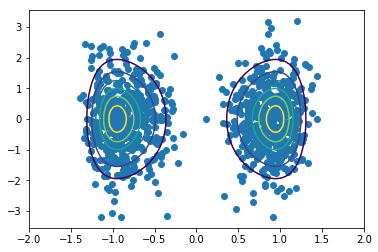

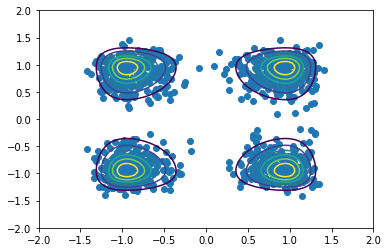

In [2]:
vis_dist(tr.Separate(dist.mvnorm(np.zeros(2), np.eye(2)), [0, ], 0., 0.3), 1000, [[-2,2], [-2,2]])
vis_dist(tr.Separate(dist.mvnorm(np.zeros(2), np.eye(2)), [0, 1], 0., 0.3), 1000, [[-2,2], [-2,2]])

Playing around with the power parameter of the *Separate* transform increases and decreases separation 

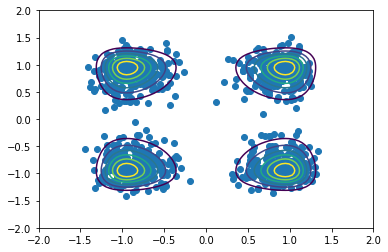

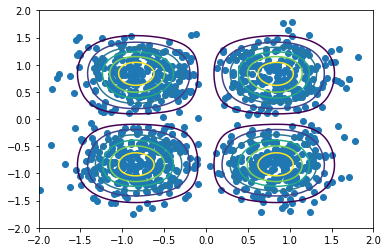

In [3]:
vis_dist(tr.Separate(dist.mvnorm(np.zeros(2), np.eye(2)), [0, 1], 0., 0.3), 1000, [[-2,2], [-2,2]])
vis_dist(tr.Separate(dist.mvnorm(np.zeros(2), np.eye(2)), [0, 1], 0., 0.5), 1000, [[-2,2], [-2,2]])

And the transformation is fully invertible: we can get back to the gaussian we started with (because of a bug in the implementation, the contours are messed up for the second plot)

/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1480: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1481: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


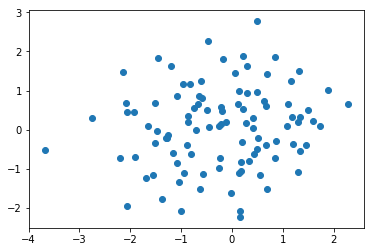

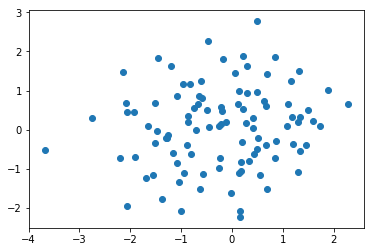

In [4]:
np.random.seed(1)
plt.scatter(*dist.mvnorm(np.zeros(2), np.eye(2)).rvs(100).T)
np.random.seed(1)
vis_dist(tr.Separate(tr.Separate(dist.mvnorm(np.zeros(2), np.eye(2)), [0, 1], 0., 0.3), [0, 1], 0., 1./0.3), 100, [[-2,2], [-2,2]])
np.random.seed()

Demonstration of some of the other implemented transforms (Softplus, power, multiplication of differnt dimensions)

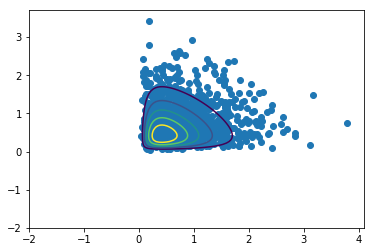

d [-0. -0.]
d [  1.   25.5]


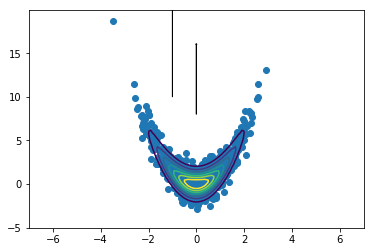

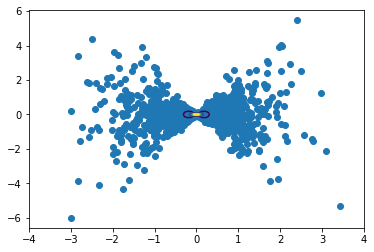

In [76]:
vis_dist(tr.Softplus(dist.mvnorm(np.zeros(2), np.eye(2)), [0, 1]), 1000, [[-2,2], [-2,2]])
vis_dist(tr.Power(dist.mvnorm(np.zeros(2), np.eye(2)), np.array([1]), 1.5, 0, 2), 1000, [[-7,7], [-5,10]])
vis_dist(tr.TimesFirst(dist.mvnorm(np.zeros(2), np.eye(2)), [ 1]), 1000, [[-4,4], [-2,2]])
#vis_dist(tr.DivByFirst(dist.mvnorm(np.zeros(2), np.eye(2)), [ 1]), 1000, [[-2,2], [-2,2]])